<center> <h1>PRIMERA PREDICIÓN DEL SUEÑO DE UN PACIENTE</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>

[URL PHYSIONET](https://physionet.org/content/sleep-accel/1.0.0/)

###### Indice

* **1. Preprocesado, extracción de características.**
  *   **1.1 Extracción variables de frecuencia cardíaca**
  *  **1.2 Extracción variables de movimiento**
  *  **1.3 Obtención matrices**
* **2. Conjuntos Train y Test**
  * **2.1 Preparación datos de entreada y salida**
* **3. Clasificador SVM Binario**
   * **3.1 Creación del modelo y selección parámetros libres**
   * **3.2 Evaluación del modelo**
* **4. Clasficador SVM Multiclase**
   * **4.1 Creación del modelo y selección parámetros libres**
      *     **4.2.1**
      *     **4.2.2**
   * **4.3 Evaluación del modelo**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statistics as stats
from sklearn.model_selection import GridSearchCV
from random import sample
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

## 1. CARGAR DATOS

### 2.1 Preparación datos de entrada y salida

In [2]:
#Train
Train= pd.read_csv('Train.csv').drop(['Unnamed: 0'], axis = 1)
Test= pd.read_csv('Test.csv').drop(['Unnamed: 0'], axis = 1)

In [3]:
X_train=Train.drop(['Etiquetas', 'Etiquetas binarias','ID_P'], axis = 1) 
y_train_bin=Train['Etiquetas binarias']
y_train_multi=Train['Etiquetas']

X_test=Test.drop(['Etiquetas', 'Etiquetas binarias','ID_P'], axis = 1)
y_test_bin=Test['Etiquetas binarias']
y_test_multi=Test['Etiquetas']

In [4]:
#X_train

In [5]:
#X_test

## 3. Clasficador SVM Binario


### 3.1  Creación del modelo y selección parámetros libres

In [6]:
clf = SVC(kernel='linear',gamma=0.1) #fijo gamma
modelo_base=clf.fit(X_train,y_train_bin)

In [7]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 3.2  Evaluación del modelo según valor de hiperparámetro.

In [8]:
Cs =[0.1,1,10,100,1000,1000]
param_grid = {'C': Cs}
svc_grid = GridSearchCV(clf, param_grid, scoring='accuracy',cv=5,n_jobs=-1)
svc_grid.fit(X_train, y_train_bin)
svc_grid.best_params_

C:\Users\rober\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10}

In [9]:
svc_clf=svc_grid.best_estimator_

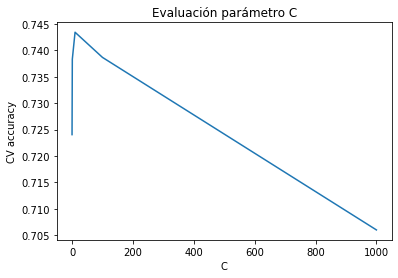

C que maximiza tasa de acierto: 10.0


In [10]:
c_scores=[]
for c in Cs:
    clf = SVC(kernel='linear',gamma=0.1, C=c)
    scores=cross_val_score(clf,X_train,y_train_bin,cv=5,scoring='accuracy',n_jobs=-1)
    c_scores.append(scores.mean())
    

plt.figure()
plt.plot(Cs,c_scores)
plt.xlabel('C')
plt.ylabel('CV accuracy')
plt.title("Evaluación parámetro C")
plt.show()

#Select maximo considerando accuracy
print("C que maximiza tasa de acierto:",np.array(Cs)[c_scores.index(np.array(c_scores).max())])

In [11]:
print("Tasa de acierto del modelo base:",modelo_base.score(X_test,y_test_bin))
print("Tasa de acierto con la busqueda de parámetros:",svc_clf.score(X_test,y_test_bin))

#Mejora
print('Mejora  del {:0.2f}%.'.format( 100 * (svc_clf.score(X_test,y_test_bin) - modelo_base.score(X_test,y_test_bin)) / modelo_base.score(X_test,y_test_bin)))

Tasa de acierto del modelo base: 0.67
Tasa de acierto con la busqueda de parámetros: 0.68
Mejora  del 1.49%.


### 3.3 Evaluación del modelo

In [12]:
predict = svc_clf.predict(X_test)

#EVALUACION
acc_test= svc_clf.score(X_test, y_test_bin).round(4)
acc_train= svc_clf.score(X_train, y_train_bin).round(4)
print('La exactitud para el modelo de SVM en el conjunto de TEST es:',acc_test,'\n')
print('La exactitud para el modelo de SVM en el conjunto de TRAIN es:',acc_train,'\n')

print('Confusion Matrix')
print(confusion_matrix(y_test_bin, predict),'\n')

print("=============== Classification Report ================")
print(classification_report(y_test_bin, predict))
#matriz_confusion=pd.crosstab(Y_test,predict, rownames=['Clase predicha'], colnames=['Resultado del clasificador'])

La exactitud para el modelo de SVM en el conjunto de TEST es: 0.68 

La exactitud para el modelo de SVM en el conjunto de TRAIN es: 0.7571 

Confusion Matrix
[[ 3 30]
 [ 2 65]] 

=============== Classification Report ================
              precision    recall  f1-score   support

         0.0       0.60      0.09      0.16        33
         1.0       0.68      0.97      0.80        67

    accuracy                           0.68       100
   macro avg       0.64      0.53      0.48       100
weighted avg       0.66      0.68      0.59       100



In [13]:
matriz_confusion=pd.crosstab(y_test_bin,predict, rownames=['Clase predicha'], colnames=['Resultado del clasificador'])

In [14]:
matriz_confusion

Resultado del clasificador,0.0,1.0
Clase predicha,,
0.0,3,30
1.0,2,65


## 4. Clasficador SVM Multiclase
### 4.1 Creación del modelo y selección parámetros libres

In [15]:
clf = SVC(kernel='linear',gamma=0.1)
modelo_base=clf.fit(X_train,y_train_multi)

### 4.2 Evaluación hiperparámetros con validación cruzada

In [16]:
Cs =[0.1,1,10,100,1000]
param_grid = {'C': Cs}
svc_grid = GridSearchCV(clf, param_grid, scoring='accuracy',cv=3,n_jobs=-1)
svc_grid.fit(X_train, y_train_multi)
svc_grid.best_params_

C:\Users\rober\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\rober\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1}

C:\Users\rober\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\rober\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\rober\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\rober\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The mi

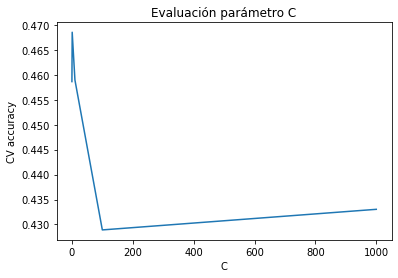

C que maximiza tasa de acierto: 1.0


In [17]:
c_scores=[]
for c in Cs:
    clf = SVC(kernel='linear',gamma=0.1, C=c)
    scores=cross_val_score(clf,X_train,y_train_multi,cv=5,scoring='accuracy',n_jobs=-1)
    c_scores.append(scores.mean())
    

plt.figure()
plt.plot(Cs,c_scores)
plt.xlabel('C')
plt.ylabel('CV accuracy')
plt.title("Evaluación parámetro C")
plt.show()

#Select maximo considerando accuracy
print("C que maximiza tasa de acierto:",np.array(Cs)[c_scores.index(np.array(c_scores).max())])

In [18]:
svc_clf=svc_grid.best_estimator_

In [19]:
print("Tasa de acierto del modelo base:",modelo_base.score(X_test,y_test_multi))
print("Tasa de acierto con la busqueda de parámetros:",svc_clf.score(X_test,y_test_multi))

#Mejora
print('Mejora  del {:0.2f}%.'.format( 100 * (svc_clf.score(X_test,y_test_multi) - modelo_base.score(X_test,y_test_multi)) / modelo_base.score(X_test,y_test_multi)))

Tasa de acierto del modelo base: 0.44
Tasa de acierto con la busqueda de parámetros: 0.44
Mejora  del 0.00%.


In [20]:
"""
pacientes = len(y_test_bin)
t = np.arange(0,pacientes)
plt.figure(figsize=(15,9))
plt.plot(t,y_test_bin,color='blue', marker='.',label='Real')
plt.plot(t,predict,color='green', marker='.',label='Predicha')

plt.title('Fase del sueño real vs. predicha en los primeros 30s')
plt.xlabel('Muestras de pacientes')
plt.ylabel('Fase del sueño')
#plt.yticks([-1,0])
#plt.xlim([0,10])
plt.legend()

"""

"\npacientes = len(y_test_bin)\nt = np.arange(0,pacientes)\nplt.figure(figsize=(15,9))\nplt.plot(t,y_test_bin,color='blue', marker='.',label='Real')\nplt.plot(t,predict,color='green', marker='.',label='Predicha')\n\nplt.title('Fase del sueño real vs. predicha en los primeros 30s')\nplt.xlabel('Muestras de pacientes')\nplt.ylabel('Fase del sueño')\n#plt.yticks([-1,0])\n#plt.xlim([0,10])\nplt.legend()\n\n"

### 4.3 Evaluación del modelo

In [21]:
predict = svc_clf.predict(X_test)

#EVALUACION
acc_test= svc_clf.score(X_test, y_test_multi).round(4)
acc_train= svc_clf.score(X_train, y_train_multi).round(4)
print('La exactitud para el modelo de SVM en el conjunto de TEST es:',acc_test,'\n')
print('La exactitud para el modelo de SVM en el conjunto de TRAIN es:',acc_train,'\n')

print('Confusion Matrix')
print(confusion_matrix(y_test_multi, predict),'\n')

print("=============== Classification Report ================")
print(classification_report(y_test_multi, predict))

La exactitud para el modelo de SVM en el conjunto de TEST es: 0.44 

La exactitud para el modelo de SVM en el conjunto de TRAIN es: 0.5048 

Confusion Matrix
[[ 2  0  0  4  0  0  0]
 [ 0  2  0 10  0  0  0]
 [ 0  1  0  2  3  0  0]
 [ 1  1  1 39  4  0  0]
 [ 0  1  0 10  1  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0 15  0  0  0]] 

=============== Classification Report ================
              precision    recall  f1-score   support

        -1.0       0.67      0.33      0.44         6
         0.0       0.40      0.17      0.24        12
         1.0       0.00      0.00      0.00         6
         2.0       0.47      0.85      0.60        46
         3.0       0.12      0.08      0.10        12
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00        15

    accuracy                           0.44       100
   macro avg       0.24      0.20      0.20       100
weighted avg       0.32      0.44      0.35       100



C:\Users\rober\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
matriz_confusion=pd.crosstab(y_test_multi,predict, rownames=['Clase predicha'], colnames=['Resultado del clasificador'])

In [23]:
matriz_confusion

Resultado del clasificador,-1.0,0.0,1.0,2.0,3.0
Clase predicha,,,,,
-1.0,2,0,0,4,0
0.0,0,2,0,10,0
1.0,0,1,0,2,3
2.0,1,1,1,39,4
3.0,0,1,0,10,1
4.0,0,0,0,3,0
5.0,0,0,0,15,0


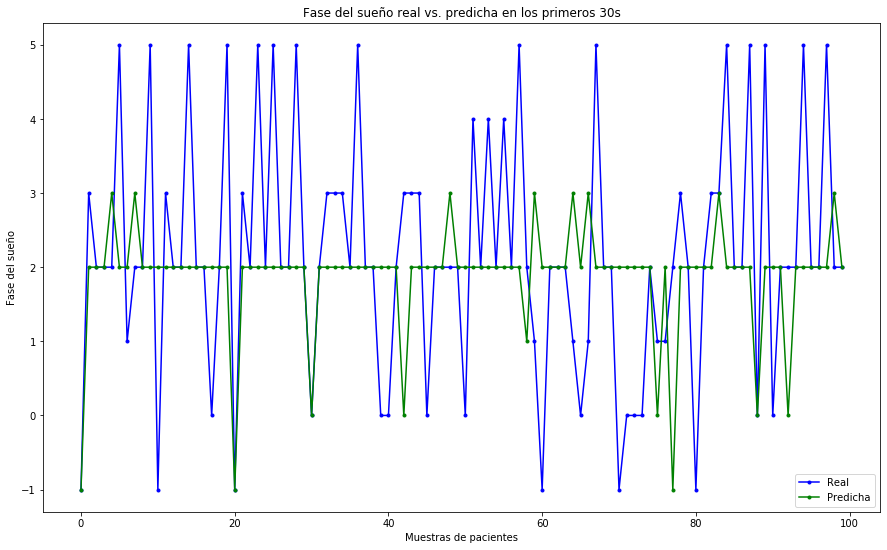

In [24]:
pacientes = len(y_test_multi)
t = np.arange(0,pacientes)
plt.figure(figsize=(15,9))
plt.plot(t,y_test_multi,color='blue', marker='.',label='Real')
plt.plot(t,predict,color='green', marker='.',label='Predicha')

plt.title('Fase del sueño real vs. predicha en los primeros 30s')
plt.xlabel('Muestras de pacientes')
plt.ylabel('Fase del sueño')
#plt.yticks([-1,0])
#plt.xlim([0,10])
plt.legend()